In [80]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('C:/Users/Swati Choudhary/Studies/AMDM/graphs_processed/ca-GrQc.txt', sep=" ", header=None)[1:]\
        .drop([2,3,4], axis=1)
data.columns = ['Node_1' , 'Node_2']

In [3]:
cluster_value = pd.read_csv('C:/Users/Swati Choudhary/Studies/AMDM/graphs_processed/ca-GrQc.txt', sep=" ", header=None)\
                .head(1)[4][0]

In [4]:
nodes_1 = set(data.Node_1.unique())
nodes_2 = set(data.Node_2.unique())

In [5]:
val_node2_not_node1 = nodes_2.difference(nodes_1)
val_node1_not_node2 = nodes_1.difference(nodes_2)

In [6]:
val_node2_not_node1_Df = pd.DataFrame(list(val_node2_not_node1))
val_node2_not_node1_Df.columns = ['Node_1']
val_node2_not_node1_Df['Node_2'] = ""
val_node1_not_node2_Df = pd.DataFrame(list(val_node1_not_node2))
val_node1_not_node2_Df.columns = ['Node_2']
val_node1_not_node2_Df['Node_1'] = ""

In [7]:
data = pd.concat([data, val_node2_not_node1_Df], ignore_index=True)
data = pd.concat([data, val_node1_not_node2_Df], ignore_index=True)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [8]:
matrix = pd.crosstab(data.Node_1, data.Node_2)
matrix = matrix.drop('', axis=0) # Remove blank row via index which is blank
matrix = matrix.drop('', axis=1)
#print (matrix)

In [9]:
matrix.shape

(4158, 4158)

In [10]:
matrix.loc["30"]["672"]   # to check if matrix got created correctly, gives error if the node itself does not exist in txt

0

In [65]:
D = np.diag(np.sum(np.array(matrix), axis=1))
# print(D) # Degree matrix

In [66]:
L = D-np.array(matrix)
#L = D-matrix
# print(L) #Laplacian matrix

In [82]:
vecs, vals = np.linalg.eig(L)

In [86]:
print(vecs)
print(len(vecs))
print(vals)
print(len(vals))

[1. 4. 4. ... 0. 0. 0.]
4158
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
4158


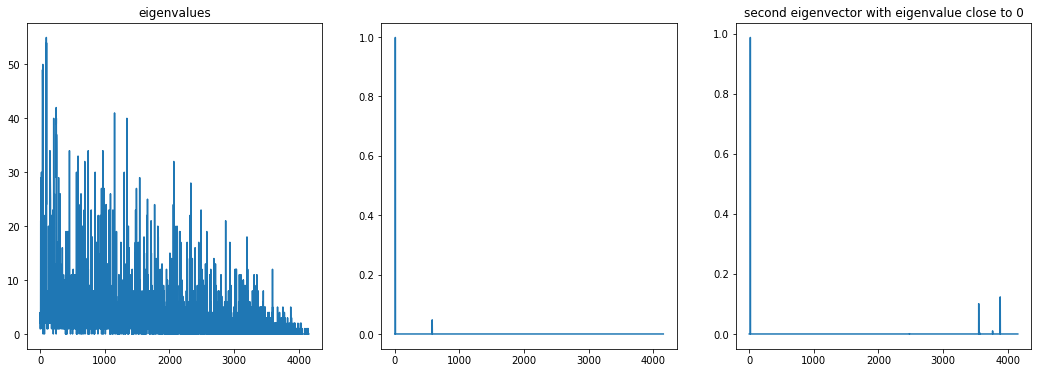

In [87]:
fig = plt.figure(figsize=[18, 6])
ax1 = plt.subplot(131)
plt.plot(vecs)
ax1.title.set_text('eigenvalues')
i = np.where(vecs < 0.5)[0]
ax2 = plt.subplot(132)
plt.plot(vals[:, i[0]])
ax3 = plt.subplot(133)
plt.plot(vals[:, i[1]])
ax3.title.set_text('second eigenvector with eigenvalue close to 0')

In [73]:
kmeans = KMeans(n_clusters=int(cluster_value), max_iter=20)

# After this all cells are not running So this part onwards needs fixing. Some variables will not exist. 

In [74]:
kmeans.fit(U.reshape(-1, 1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=20,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [75]:
result = pd.DataFrame(kmeans.predict(U.reshape(-1, 1)))
result.columns = ['Class']
result['Node'] = matrix.index
result['U'] = U.tolist()

In [ ]:
km_clustering = km.fit(X)
plt.scatter(U[:,0], U[:,1], c=km_clustering.labels_, cmap='rainbow', alpha=0.7,\
            edgecolors='b')